In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid', palette = 'Set2')

In [2]:
df = pd.read_csv('clean_data.csv')

# Feature Selection

## Data Splitting

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df.drop(columns=['life_expectancy_', 'year']).describe().columns

Index(['adult_mortality', 'alcohol', 'hepatitis_b', '_bmi_', 'polio',
       'total_expenditure', 'diphtheria_', '_thinness__1-19_years',
       '_thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'infant_deaths', 'percentage_expenditure', 'measles_',
       'under-five_deaths_', '_hiv/aids', 'gdp', 'population'],
      dtype='object')

In [5]:
Xnum = df.loc[:, df.drop(columns=['life_expectancy_', 'year']).describe().columns]

Xnum.head()

,adult_mortality,alcohol,hepatitis_b,_bmi_,polio,total_expenditure,diphtheria_,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling,infant_deaths,percentage_expenditure,measles_,under-five_deaths_,_hiv/aids,gdp,population
0,263.0,0.01,65.0,19.1,41.0,8.16,65.0,16.6,16.85,0.479,10.1,62.0,71.279624,1154.0,83.0,0.1,584.259210,29913430.0
1,271.0,0.01,62.0,18.6,58.0,8.18,62.0,16.6,16.85,0.476,10.0,64.0,73.523582,492.0,86.0,0.1,612.696514,327582.0
2,268.0,0.01,64.0,18.1,62.0,8.13,64.0,16.6,16.85,0.470,9.9,66.0,73.219243,430.0,89.0,0.1,631.744976,29913430.0
3,272.0,0.01,67.0,17.6,67.0,8.52,67.0,16.6,16.85,0.463,9.8,69.0,78.184215,1998.0,93.0,0.1,669.959000,3696958.0
4,275.0,0.01,68.0,17.2,68.0,7.87,68.0,16.6,16.85,0.454,9.5,71.0,7.097109,1998.0,97.0,0.1,63.537231,2978599.0


In [6]:
ynum = df.life_expectancy_

ynum.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: life_expectancy_, dtype: float64

In [7]:
Xnum_train, Xnum_test, ynum_train, ynum_test = train_test_split(Xnum, ynum, test_size=0.2, random_state=10)

In [8]:
features = Xnum.columns

## Selection

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectFromModel

In [10]:
Xnum_train.shape, ynum_train.shape

((1589, 18), (1589,))

In [11]:
print(f'TOTAL SEMUA FEATURES : {len(features)}\n\n')

for i in [0.001, 0.01, 0.1, 1, 1.2,  1.3, 1.5] :

    print(f'\nPenalty : {i}')

    selector = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectFromModel(Lasso(alpha=i, random_state=10)))
    ])

    selector.fit(Xnum_train, ynum_train)


    print(f'Numerical Feature Terpilih: {np.sum(selector.steps[1][1].get_support())}')
    print(f'{list(Xnum_train.columns[selector.steps[1][1].get_support()])}\n')

    print(f'Numerical Feature Terseleksi: {np.sum(~selector.steps[1][1].get_support())}')
    print(f'{list(Xnum_train.columns[~selector.steps[1][1].get_support()])}\n')

### CROSS VALIDATION ###

    estimator = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=i, random_state=10))
    ])

    model_cv = cross_val_score(estimator, Xnum_train, ynum_train, cv=5, scoring = 'neg_mean_squared_error')
    model_cv = abs(model_cv)
    # print('Score : ', np.sqrt(model_cv)),
    print('Score (mean) : ', round(np.sqrt(model_cv).mean(), 2))
    print('Score (std) : {}\n\n' .format(round(np.sqrt(model_cv).std(), 2)))

TOTAL SEMUA FEATURES : 18



Penalty : 0.001
Numerical Feature Terpilih: 18
['adult_mortality', 'alcohol', 'hepatitis_b', '_bmi_', 'polio', 'total_expenditure', 'diphtheria_', '_thinness__1-19_years', '_thinness_5-9_years', 'income_composition_of_resources', 'schooling', 'infant_deaths', 'percentage_expenditure', 'measles_', 'under-five_deaths_', '_hiv/aids', 'gdp', 'population']

Numerical Feature Terseleksi: 0
[]

Score (mean) :  3.63
Score (std) : 0.16



Penalty : 0.01
Numerical Feature Terpilih: 17
['adult_mortality', 'hepatitis_b', '_bmi_', 'polio', 'total_expenditure', 'diphtheria_', '_thinness__1-19_years', '_thinness_5-9_years', 'income_composition_of_resources', 'schooling', 'infant_deaths', 'percentage_expenditure', 'measles_', 'under-five_deaths_', '_hiv/aids', 'gdp', 'population']

Numerical Feature Terseleksi: 1
['alcohol']

Score (mean) :  3.64
Score (std) : 0.16



Penalty : 0.1
Numerical Feature Terpilih: 14
['adult_mortality', 'hepatitis_b', '_bmi_', 'polio', 'total_e

penalty yang dipilih adalah 1.2 karena selisih score tidak banyak dengan 1, namun bisa mengurangi features cukup lumayan

In [12]:
estimator = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=1.2, random_state=10))
])

estimator.fit(Xnum_train, ynum_train)

ynum_pred = estimator.predict(Xnum_test)

print(f'RMSE : {np.sqrt(mean_squared_error(ynum_test, ynum_pred))}')
print(f'R2 :{round(r2_score(ynum_test, ynum_pred) * 100, 2)} %')

RMSE : 4.1949630045538076
R2 :80.83 %


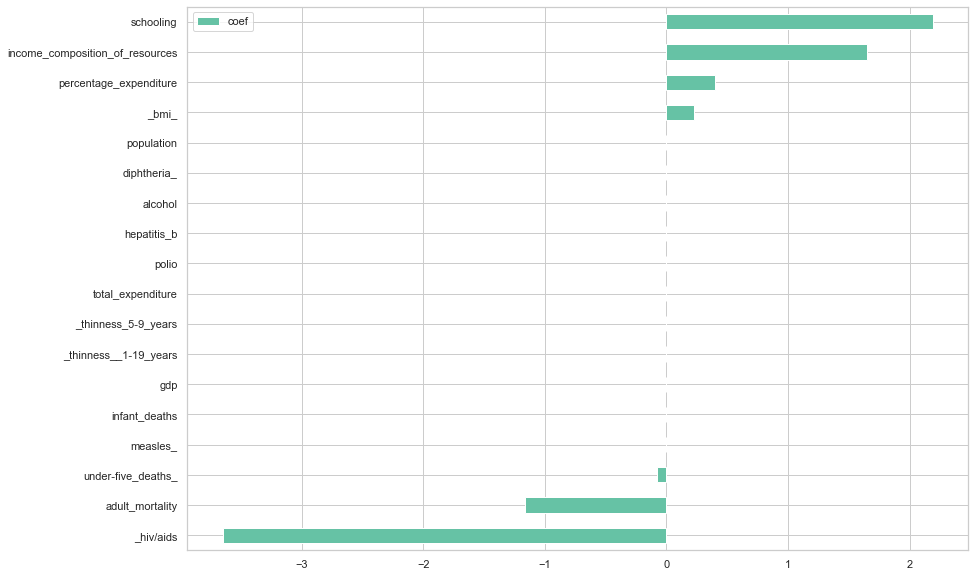

In [13]:
pd.DataFrame(estimator.steps[1][1].coef_, index=features, columns=['coef']).sort_values(by = 'coef').plot(kind = 'barh', figsize = (14,10))

# plt.savefig('lasso_coeff.png')

In [14]:
selected_features = list(Xnum.columns[pd.DataFrame(estimator.steps[1][1].coef_, index=features, columns=['coef'])['coef'] != 0])

selected_features

['adult_mortality',
 '_bmi_',
 'income_composition_of_resources',
 'schooling',
 'percentage_expenditure',
 'under-five_deaths_',
 '_hiv/aids']

# Model Evaluation

## Data Splitting

In [15]:
X = df.loc[:, ['country', 'year'] + selected_features]

X.columns

Index(['country', 'year', 'adult_mortality', '_bmi_',
       'income_composition_of_resources', 'schooling',
       'percentage_expenditure', 'under-five_deaths_', '_hiv/aids'],
      dtype='object')

In [16]:
y = df.life_expectancy_

y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: life_expectancy_, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Preprocessing

In [18]:
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [19]:
transformer = ColumnTransformer([
    ('binary', ce.BinaryEncoder(), ['country']),
], remainder='passthrough')

transformer.fit_transform(X_train)

features =transformer.get_feature_names()

In [20]:
pd.DataFrame(transformer.fit_transform(X_train), columns=features).head()

,binary__country_0,binary__country_1,binary__country_2,binary__country_3,binary__country_4,binary__country_5,binary__country_6,binary__country_7,binary__country_8,year,adult_mortality,_bmi_,income_composition_of_resources,schooling,percentage_expenditure,under-five_deaths_,_hiv/aids
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2009.0,118.0,61.1,0.709,12.5,106.948290,27.0,0.1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2003.0,132.0,47.5,0.684,11.8,70.541853,2.0,0.1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2001.0,495.0,17.1,0.424,9.8,46.830275,70.0,5.3
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2011.0,347.0,16.7,0.477,10.7,94.496868,114.0,5.3
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2003.0,71.0,59.6,0.863,16.0,1731.755747,1.0,0.1


In [26]:
estimator = Pipeline([
    ('preprocess', transformer),
    # ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

model_cv = cross_val_score(estimator, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

model_cv = abs(model_cv)
print('Score : ', np.sqrt(model_cv)),
print('Score (mean) : ', round(np.sqrt(model_cv).mean(), 2))
print('Score (std) : {}\n' .format(round(np.sqrt(model_cv).std(), 2)))

# BILA MUNCUL NULL VALUE, HARAP DI RUN ULANG SAMPAI MUNCUL NILAINYA

Score :  [3.59217795 3.731014   3.72553192 3.79095302 3.45795788]
Score (mean) :  3.66
Score (std) : 0.12



In [27]:
## EVALUASI :

estimator.fit(X_train, y_train)

y_pred = estimator.predict(X_test)

print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R2 :{round(r2_score(y_test, y_pred) * 100, 2)} %')

RMSE : 3.7126884462940763
R2 :84.98 %


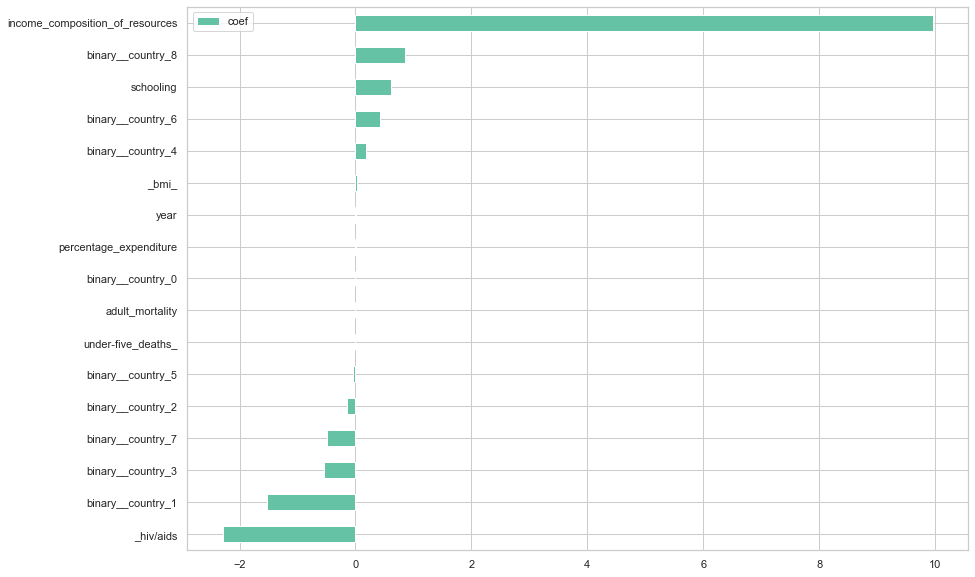

In [28]:
pd.DataFrame(estimator.steps[1][1].coef_, index = features, columns = ['coef']).sort_values(by='coef').plot(kind='barh', figsize = (14,10))

# plt.savefig('regression_coef.png')

# SAVING MODEL : REGRESSION

In [29]:
import pickle

In [31]:
estimator.fit(X, y)

pickle.dump(estimator, open('regression_model.sav', 'wb'))

# BILA TERJADI ERROR, HARAP DI RUN ULANG SAMPAI TIDAK MUNCUL ERROR

# TESTING

In [32]:
reg_model = pd.read_pickle(r'regression_model.sav')

In [33]:
X.columns

Index(['country', 'year', 'adult_mortality', '_bmi_',
       'income_composition_of_resources', 'schooling',
       'percentage_expenditure', 'under-five_deaths_', '_hiv/aids'],
      dtype='object')

In [34]:
test = pd.DataFrame({
    'country' : ['Indonesia'],
    'year' : [2016],
    'adult_mortality' : [180],
    '_bmi_' : [25],
    'income_composition_of_resources' : [1.0],
    'schooling' : [0.7],
    'percentage_expenditure' : [135],
    'under-five_deaths_' : [120],
    '_hiv/aids' : [0.1]
    })

In [35]:
reg_model.predict(test)[0]

65.67376676739605